# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn import over_sampling

warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4

# Load Dataset

In [3]:
try:
  df = pd.read_csv('Churn_Modelling.csv')
except:
  df = df = pd.read_csv('https://raw.githubusercontent.com/chakraskun/churn-modelling/main/Churn_Modelling.csv')

In [4]:
#melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Pengamatan:<br>
Tidak ada data yang missing, sehingga bisa dilanjutkan proses selanjutnya tanpa harus melakukan proses missing value

# Statistical Summary

In [5]:
numerical = [
  # 'RowNumber',
  # 'CustomerId',
  'CreditScore',
  'Age',
  'Balance',
  'EstimatedSalary',
  'NumOfProducts','Tenure',  
]
categorical = [
  'Surname',
  'Geography',
  'Gender',
    'HasCrCard',
  'IsActiveMember',

]

In [6]:
df[numerical].describe()

,CreditScore,Age,Balance,EstimatedSalary,NumOfProducts,Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881,1.530200,5.012800
std,96.653299,10.487806,62397.405202,57510.492818,0.581654,2.892174
min,350.000000,18.000000,0.000000,11.580000,1.000000,0.000000
25%,584.000000,32.000000,0.000000,51002.110000,1.000000,3.000000
50%,652.000000,37.000000,97198.540000,100193.915000,1.000000,5.000000
75%,718.000000,44.000000,127644.240000,149388.247500,2.000000,7.000000
max,850.000000,92.000000,250898.090000,199992.480000,4.000000,10.000000


Pengataman dari Fitur Numerical:
- Kolom `CreditScore`, `Age`, `EstimatedSalary`,`Tenure` sudah cukup simetrik distribusinya (mean dan median tidak terlalu jauh)
- Kolom `Balance` skewed

In [7]:
df[categorical].describe(include=[object])

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Drop Column

In [8]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

Kolom `RowNumber`,`CustomerId`,dan `Surname` didrop dikarenakan membunyai banyak value unique

# Outliers Handling

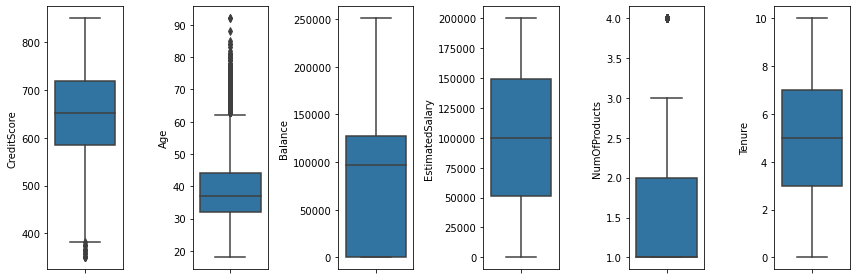

In [9]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]])
    plt.tight_layout()

Feature `age` dan `numofproducts` tidak akan dibuang untuk data outliers dikarenakan secara konseptual hal tersebut masih memungkinkan, sehingga pada dataset ini akan melakukan handling pada feature `CreditScore`. Handling outliers akan menggunakan pendekatan konservatif yaitu Z-Score

In [10]:
from scipy import stats

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
zscore = np.abs(stats.zscore(df['CreditScore'])) # hitung absolute z-scorenya
filtered_entries = (zscore < 3)  # keep yang kurang dari 3 absolute z-scorenya
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9992


# Split data into train and test

In [12]:
df_train,df_test = train_test_split(df,test_size=0.2, random_state=42) #Splitting the data into Train and Test

# Feature Scaling in Training Data

In [13]:
#input code below
handled_dataset = [df_train, df_test]
for i in handled_dataset:
  i['LogAge'] = np.log(i['Age'])



<ipython-input-13-525ddc7bc460>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['LogAge'] = np.log(i['Age'])


In [14]:
for i in handled_dataset:
  i['LogAgeNorm'] = MinMaxScaler().fit_transform(i['LogAge'].values.reshape(len(i), 1))
  i['BalanceStd'] = StandardScaler().fit_transform(i['Balance'].values.reshape(len(i), 1))
  i['BalanceNorm'] = MinMaxScaler().fit_transform(i['BalanceStd'].values.reshape(len(i), 1))
  i['EstimatedSalaryStd'] = StandardScaler().fit_transform(i['EstimatedSalary'].values.reshape(len(i), 1))
  i['EstimatedSalaryNorm'] = MinMaxScaler().fit_transform(i['EstimatedSalaryStd'].values.reshape(len(i), 1))
  i['TenureNorm'] = MinMaxScaler().fit_transform(i['Tenure'].values.reshape(len(i), 1))
  i['NumOfProductsNorm'] = MinMaxScaler().fit_transform(i['NumOfProducts'].values.reshape(len(i), 1))
  i['CreditScoreNorm'] = MinMaxScaler().fit_transform(i['CreditScore'].values.reshape(len(i), 1))


<ipython-input-14-92a6fefe9e32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['LogAgeNorm'] = MinMaxScaler().fit_transform(i['LogAge'].values.reshape(len(i), 1))
<ipython-input-14-92a6fefe9e32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['BalanceStd'] = StandardScaler().fit_transform(i['Balance'].values.reshape(len(i), 1))
<ipython-input-14-92a6fefe9e32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

# Feature Encoding in Training and Test Data

kolom `gender` akan dilakukan label encoding, sementara `geography` akan menggunakan one-hot coding

In [15]:
df_test.shape

(1999, 20)

#### Label Encoding 

In [16]:
# input code below

mapping_gender = {
    'Female' : 0,
    'Male' : 1
  }
for i in handled_dataset:
  i['Gender'] = i['Gender'].map(mapping_gender)

<ipython-input-16-9ad53f36acd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['Gender'] = i['Gender'].map(mapping_gender)


#### One-hot coding

In [17]:
# input code below
for i in handled_dataset:
  one_hot_encoding = pd.get_dummies(i['Geography'], prefix='geo')
  if i.shape[0] >7000:
    df_train = df_train.join(one_hot_encoding)
  if i.shape[0] < 2000:
    df_test = df_test.join(one_hot_encoding)


# Drop Column Outdated

In [18]:
handled_dataset = [df_train, df_test]
for i in handled_dataset:
  i.drop(columns=['Geography','Age', 'Balance', 'EstimatedSalary', 'EstimatedSalaryStd', 
                  'BalanceStd', 'Tenure', 'NumOfProducts', 'LogAge', 'CreditScore'], inplace=True)

# Handling Imbalance

In [19]:
X = df_train[[col for col in df_train.columns if (str(df_train[col].dtype) != 'object') and col != 'Exited']]
y = df_train['Exited'].values
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=1, random_state=42).fit_resample(X, y)

print('BEFORE')
print(pd.Series(y).value_counts())
print('----------------------')
print('AFTER')
print(pd.Series(y_over_SMOTE).value_counts())

BEFORE
0    6360
1    1633
dtype: int64
----------------------
AFTER
0    6360
1    6360
dtype: int64


# Modelling

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve

comparison_dict, comparison_test_dict = {}, {}


In [21]:
X_train = X_over_SMOTE
y_train = y_over_SMOTE
X_test = df_test[[col for col in df_test.columns if (str(df_test[col].dtype) != 'object') and col != 'Exited']]
y_test = df_test['Exited'].values

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test on train Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test on train Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test on train Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test on train Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [23]:
def plot_confusion_matrix(cm, ax):
    '''Plot a confusion matrix in the specified axes object.'''
    sns.heatmap(data=cm,
                annot=True,
                cmap='Blues',
                annot_kws={'fontsize': 30},
                ax=ax)

    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['Retained', 'Churned'])

    ax.set_ylabel('True Label')
    ax.set_yticks([0.25, 1.25])
    ax.set_yticklabels(['Retained', 'Churned']);


def plot_feature_importance(classifier, classifier_name, color, ax):
    '''Plot the importance of features for a classifier as a barplot.'''
    importances = pd.DataFrame({'Feature': X_train.columns,
                                'Importance': np.round(classifier.best_estimator_.feature_importances_, 3)})

    importances = importances.sort_values('Importance', ascending=True).set_index('Feature')

    importances.plot.barh(color=color,
                          edgecolor='firebrick',
                          legend=False,
                          ax=ax)
    ax.set_title(classifier_name)
    ax.set_xlabel('Importance');

def plot_learning_curve(estimator,
                    X,
                    y,
                    ax,
                    cv=None,
                    train_sizes=np.linspace(0.1, 1.0, 5)):
  '''Plot the learning curves for an estimator in the specified axes object.'''
  train_sizes, train_scores, test_scores = learning_curve(
      estimator,
      X,
      y,
      cv=cv,
      n_jobs=-1,
      train_sizes=train_sizes,
      scoring='accuracy')

  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  ax.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std,
                  alpha=0.1,
                  color='dodgerblue')
  ax.fill_between(train_sizes,
                  test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std,
                  alpha=0.1,
                  color='darkorange')

  ax.plot(train_sizes,
          train_scores_mean,
          color='dodgerblue',
          marker='o',
          linestyle='-',
          label='Training Score')
  ax.plot(train_sizes,
          test_scores_mean,
          color='darkorange',
          marker='o',
          linestyle='-',
          label='Cross-validation Score')

  ax.set_xlabel('Training Examples')
  ax.set_ylabel('Score')
  ax.legend(loc='best', fontsize=14);

def classifier_performance(classifier, classifier_name, classifier_name_abv):
    '''Display the overall performance of a classifier with this template.'''
    print('\n', classifier_name)
    print('-------------------------------')
    print('   Best Score ({}): '.format('recall') + str(np.round(classifier.best_score_, 3)))
    print('   Best Parameters: ')
    for key, value in classifier.best_params_.items():
        print('      {}: {}'.format(key, value))

    y_pred_pp = cross_val_predict(estimator=classifier.best_estimator_,
                                  X=X_train,
                                  y=y_train,
                                  cv=5,
                                  method='predict_proba')[:, 1]
    y_pred = y_pred_pp.round()

    cm = confusion_matrix(y_train, y_pred, normalize='true')

    # fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
    # comparison_dict[classifier_name_abv] = [
    #     accuracy_score(y_train, y_pred),
    #     precision_score(y_train, y_pred),
    #     recall_score(y_train, y_pred),
    #     roc_auc_score(y_train, y_pred_pp), fpr, tpr
    # ]

    fig, (ax1) = plt.subplots(1, 1, figsize=(6, 5))

    plot_confusion_matrix(cm, ax1)
    # plot_learning_curve(classifier.best_estimator_, X_train, y_train, ax2)

    plt.tight_layout();

In [24]:
models = []
models.append((
  'Logistic Regression',
  LogisticRegression(random_state = 42),
  {
    'max_iter': [100],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
  }
))
models.append((
  'Decision Tree',
  DecisionTreeClassifier(random_state = 42),
  {
    'max_depth': [int(x) for x in np.linspace(1, 300, num = 80)], 
    'min_samples_split': [2, 5, 10, 100,200,500,1000], 
    'min_samples_leaf': [1, 2, 4, 10, 20, 50,100],
    'max_features': ['auto', 'sqrt']
  }
))
models.append((
  'Random Forest',
  RandomForestClassifier(random_state = 42),
  {
    'n_estimators': [100],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [6],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
  }
))
models.append((
  'Gradient Boosting',
  GradientBoostingClassifier(random_state = 42),
  {
    'n_estimators': [600],
    'subsample': [0.66, 0.75],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3],  # default=3
    'min_samples_split': [5, 7],
    'min_samples_leaf': [3, 5],
    'max_features': ['auto', 'log2', None],
    'n_iter_no_change': [20],
    'validation_fraction': [0.2],
    'tol': [0.01]
  }
))
models.append((
  "LightGBM",
  LGBMClassifier(random_state = 42),
  {
    'max_depth': [5],
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01],
    'n_estimators': [200],
    'feature_fraction': [0.5],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
  }
))
models.append((
  "XGBoost",
  XGBClassifier(random_state=42,eval_metric='logloss',use_label_encoder=False),
  {
    'n_estimators': [50],
    'learning_rate': [0.001, 0.01],
    'max_depth': [3, 4],  # default=6
    'reg_alpha': [1, 2],
    'reg_lambda': [1, 2],
    'subsample': [0.5, 0.75],
    'colsample_bytree': [0.50, 0.75],
    'gamma': [0.1, 0.5, 1],
    'min_child_weight': [1]
  }
))
models.append((
  'AdaBoost',
  AdaBoostClassifier(random_state = 42),
  {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
    'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
    'algorithm': ['SAMME', 'SAMME.R']
  }
))

In [25]:
result_modelling = {}
model_name = []
train_score = []
test_score = []
recall_score_list = []
score_acc_list = []
precision_score_list = []

best_tuned = []
train_score_tuned = []
test_score_tuned = []
recall_score_list_tuned = []
score_acc_list_tuned = []
precision_score_list_tuned = []

for name, model, hyperparameter in models:
    # if name != 'Logistic Regression':
    #   continue
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_name.append(name)
    score_acc_list.append(round(accuracy_score(y_test, y_pred),2))
    precision_score_list.append(round(precision_score(y_test, y_pred),2))
    recall_score_list.append(round(recall_score(y_test, y_pred),2))
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    #tuned
    if name in ['XGBoost', 'AdaBoost']:
      model_tuned = RandomizedSearchCV(model, hyperparameter, cv=5, n_iter=20, scoring='recall', n_jobs=-1)
    else:
      model_tuned = GridSearchCV(model, hyperparameter, cv=5, n_jobs=-1, scoring='recall', verbose=False)
    best = model_tuned.fit(X_train, y_train)
    best_tuned.append(best)
    y_pred_tuned = best.predict(X_test)
    train_score_tuned.append(best.score(X_train, y_train))
    test_score_tuned.append(best.score(X_test, y_test))
    score_acc_list_tuned.append(round(accuracy_score(y_test, y_pred_tuned),2))
    precision_score_list_tuned.append(round(precision_score(y_test, y_pred_tuned),2))
    recall_score_list_tuned.append(round(recall_score(y_test, y_pred_tuned),2))

    classifier_performance(best, name, name)



 Logistic Regression
-------------------------------
   Best Score (recall): 0.725
   Best Parameters: 
      C: 0.01
      max_iter: 100
      penalty: l1
      solver: liblinear

 Decision Tree
-------------------------------
   Best Score (recall): 0.843
   Best Parameters: 
      max_depth: 27
      max_features: auto
      min_samples_leaf: 1
      min_samples_split: 2

 Random Forest
-------------------------------
   Best Score (recall): 0.817
   Best Parameters: 
      bootstrap: True
      criterion: gini
      max_depth: 6
      max_features: auto
      min_samples_leaf: 3
      min_samples_split: 2
      n_estimators: 100

 Gradient Boosting
-------------------------------
   Best Score (recall): 0.801
   Best Parameters: 
      learning_rate: 0.01
      max_depth: 3
      max_features: auto
      min_samples_leaf: 3
      min_samples_split: 5
      n_estimators: 600
      n_iter_no_change: 20
      subsample: 0.75
      tol: 0.01
      validation_fraction: 0.2
[LightGBM] [

In [ ]:
result_modelling['model_name'] = model_name
result_modelling['recall_score'] = recall_score_list
result_modelling['accuracy_score'] = score_acc_list
result_modelling['precision_score'] = precision_score_list
result_modelling['train_score'] = train_score
result_modelling['test_score'] = test_score
result_modelling['recall_score_tuned'] = recall_score_list_tuned
result_modelling['accuracy_score_tuned'] = score_acc_list_tuned
result_modelling['precision_score_tuned'] = precision_score_list_tuned
result_modelling['train_score_tuned'] = train_score_tuned
result_modelling['test_score_tuned'] = test_score_tuned

df_result = pd.DataFrame(result_modelling)

In [ ]:
df_result.sort_values(by=['recall_score_tuned'], ascending=False, inplace=True)
df_result

,model_name,recall_score,accuracy_score,precision_score,train_score,test_score,recall_score_tuned,accuracy_score_tuned,precision_score_tuned,train_score_tuned,test_score_tuned
4,LightGBM,0.74,0.77,0.46,0.934198,0.774887,0.72,0.77,0.45,0.829088,0.724747
2,Random Forest,0.63,0.84,0.58,1.000000,0.837419,0.71,0.79,0.48,0.832704,0.712121
5,XGBoost,0.76,0.76,0.44,0.965723,0.764382,0.71,0.78,0.47,0.813050,0.709596
3,Gradient Boosting,0.71,0.80,0.49,0.867689,0.798399,0.70,0.79,0.48,0.811164,0.704545
6,AdaBoost,0.69,0.79,0.48,0.835456,0.790395,0.70,0.79,0.48,0.815881,0.699495
0,Logistic Regression,0.66,0.72,0.38,0.716745,0.721361,0.67,0.70,0.36,0.727044,0.671717
1,Decision Tree,0.64,0.73,0.39,1.000000,0.730365,0.58,0.78,0.46,1.000000,0.583333


In [ ]:
# for i in range(len(model_name)):
#   classifier_performance(best_tuned[i], model_name[i], 'GBC')